<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/C%C3%B3pia_de_Atividade_M%C3%B3dulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sobre a base de dados**

Os dados de rotatividade de clientes de telecomunicações contêm informações sobre uma empresa de telecomunicações fictícia que forneceu serviços de telefone residencial e Internet para 7.043 clientes na Califórnia.

**Dicionário de dados**


* CustomerId: Customer Id
* Gender: Gender
* SeniorCitizen: Whether the customer is elderly (1.0)
* Partner: Whether the customer has a partner (Yes, No)
* Dependents: Whether the customer has dependents (Yes, No) (child, mother, father...)
* tenure: The number of months the customer stays in the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)
* OnlineBackup: Whether the customer has an online backup (Yes, No, no Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, no Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, no Internet service)
* StreamingTV: Whether the customer has broadcast TV (Yes, No, no Internet service)
* StreamingMovies: Whether the customer is streaming movies (Yes, No, no Internet service)
* Contract: Customer's contract period (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer, Credit card)
* MonthlyCharges: Amount collected from the customer monthly
* TotalCharges: Total amount collected from the customer
* Churn: Yes = the customer left the company this Month. No = the customer remained with the company.

#### Faça uma comparação entre os modelos Regressão Logistica, KNN e Decision Tree e responda as seguintes perguntas:

* Qual modelo apresenta o maior desempenho em treinamento?
* Qual modelo apresenta o maior desempenho em teste?
* Qual modelo você selecionaria para colocar em um sistema de previsão de churn?


Aplique as técnicas vistas em aula e selecione uma ou mais métricas de classificação para avaliar o desempenho dos modelos.


---


*Utilize o seu conhecimento sobre os dados para selecionar e tratar as features da melhor forma.*

*Busque justificar a escolha das técnicas. Exemplo: "Estou aplicando a transformação OneHotEncoder pois...", "Estou utilizando um crossvalidation pois..."*


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = 'https://raw.githubusercontent.com/profEraylson/datasets/main/churn_telecom.csv'

df = pd.read_csv(path)

##Verificação dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1654,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.8,No
5142,6408-OTUBZ,Female,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),104.55,6779.05,No
1437,1666-JZPZT,Male,0,No,No,27,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.00,1291.35,No
1605,7941-RCJOW,Male,0,No,No,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.55,1218.65,No
6848,5916-QEWPT,Female,0,Yes,No,2,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),69.00,147.8,No
1302,3230-IUALN,Female,0,Yes,Yes,45,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,81.00,3533.6,No
3749,4424-TKOPW,Male,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,196.75,Yes
6029,9714-EDSUC,Male,0,No,No,4,Yes,No,Fiber optic,Yes,...,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,94.90,360.55,No
4280,9135-HSWOC,Male,0,Yes,Yes,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.70,1274.05,No
548,4676-MQUEA,Male,1,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),101.90,5265.5,No


In [ ]:
df.duplicated().any()

False

In [ ]:
#Na análise exploratória anterior, identificou-se que os dados da coluna TotalCharges, não estavam em valores númericos.
#Realizada conversão para type float
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')

In [ ]:
df.TotalCharges.dtype

dtype('float32')

###Análise dos dados númericos

In [ ]:
df_numeros = df.select_dtypes("number")

In [ ]:
#Nota-se que a coluna SeniorCitizen apresenta valores entre 0 e 1, indicando que os valores númericos representam categorias.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300537
std,0.368612,24.559481,30.090047,2266.771484
min,0.000000,0.000000,18.250000,18.799999
25%,0.000000,9.000000,35.500000,401.450012
50%,0.000000,29.000000,70.350000,1397.475098
75%,0.000000,55.000000,89.850000,3794.737549
max,1.000000,72.000000,118.750000,8684.799805


In [ ]:
colunas_to_drop = ['SeniorCitizen']

In [ ]:
df_numeros = df_numeros.drop(colunas_to_drop, axis = 1)

In [ ]:
#Dataframe de valores núméricos
df_numeros

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.850000
1,34,56.95,1889.500000
2,2,53.85,108.150002
3,45,42.30,1840.750000
4,2,70.70,151.649994
...,...,...,...
7038,24,84.80,1990.500000
7039,72,103.20,7362.899902
7040,11,29.60,346.450012
7041,4,74.40,306.600006


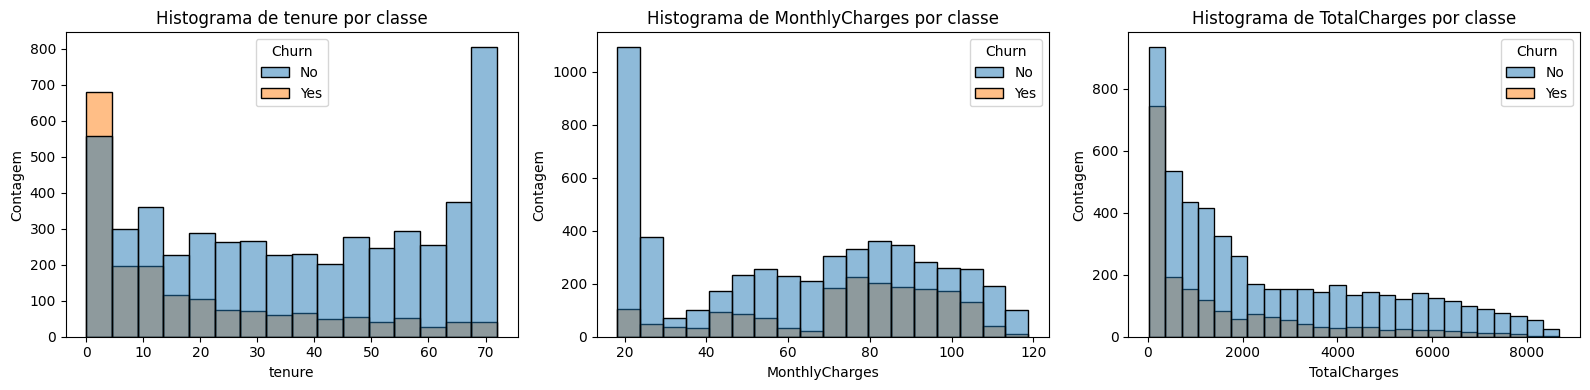

In [ ]:
#Distribuição de dados por classe
num_cols = len(df_numeros.columns)
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4))

for i, coluna in enumerate(df_numeros.columns):
    sns.histplot(data=df, x=coluna, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Histograma de {coluna} por classe')
    axes[i].set_xlabel(coluna)
    axes[i].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

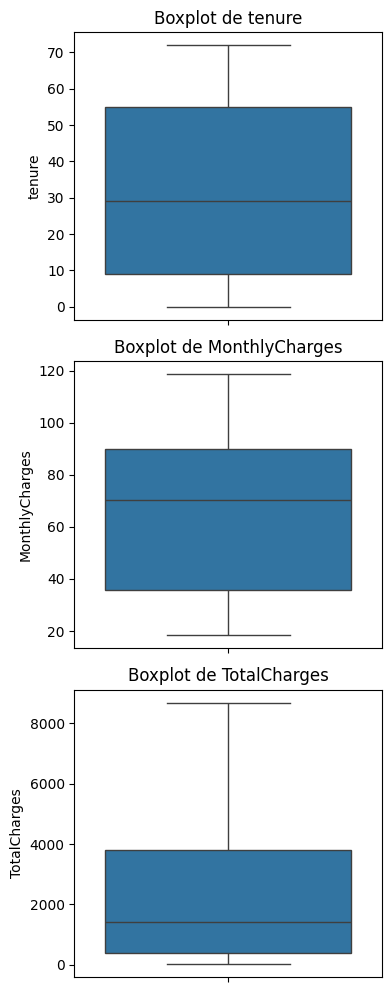

In [ ]:
#Verificando a presença de outilier dos dados númericos
fig, axes = plt.subplots(len(df_numeros.columns), 1, figsize=(4, 10))

for index, col in enumerate(df_numeros.columns):
    sns.boxplot(y=col, data=df_numeros, ax=axes[index])
    axes[index].set_title(f'Boxplot de {col}')

fig.tight_layout(pad=1.0)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Converção da coluna Churn para Encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Churn'])
df['Churn'] = y_encoded

In [ ]:
df[list(df_numeros.columns) + ['Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.850000,0
1,34,56.95,1889.500000,0
2,2,53.85,108.150002,1
3,45,42.30,1840.750000,0
4,2,70.70,151.649994,1
...,...,...,...,...
7038,24,84.80,1990.500000,0
7039,72,103.20,7362.899902,0
7040,11,29.60,346.450012,0
7041,4,74.40,306.600006,1


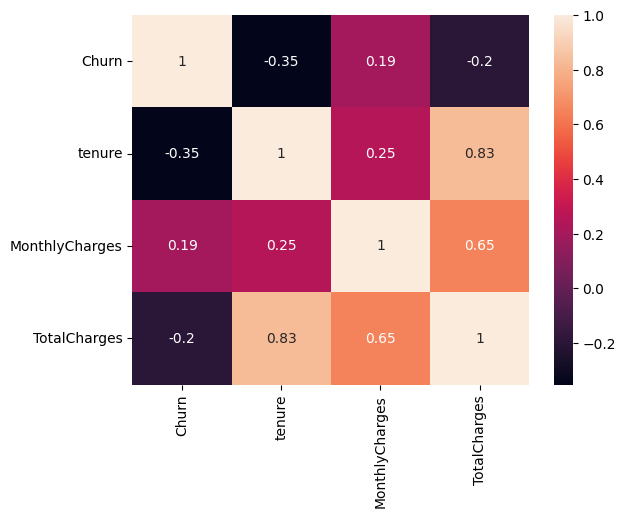

In [ ]:
df_corr = df[['Churn'] + list(df_numeros.columns)].corr()
sns.heatmap(df_corr, annot=True);

Podemos destacar as correlações entre o Churn e as demais variáveis.
* Churn e Tenure: A correlação é de -0,35, o que indica uma correlação linear negativa moderada. Isso significa que há uma tendência de os clientes com mais tempo de serviço terem menos probabilidade de cancelar.
* Churn e MonthlyCharges: A correlação é de 0,19, o que indica uma correlação linear positiva fraca. Isso significa que há uma tendência de os clientes com cobranças mensais mais altas terem mais probabilidade de cancelar.
* Churn e TotalCharges: A correlação é de -0,2, o que indica uma correlação linear negativa fraca. Isso significa que há uma tendência de os clientes com cobranças totais mais altas terem menos probabilidade de cancelar.

###Análise das variáveis categóricas


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                 int64
dtype: object

In [ ]:
#Drop da coluna id
colunas_to_drop = ['customerID']
df_temp = df.drop(colunas_to_drop, axis = 1)

In [ ]:
#Acrescentando a coluna SeniorCitizen as variavéis categóricas
cat_columns = df_temp.select_dtypes('object').columns
cat_columns = list(cat_columns) + ['SeniorCitizen']

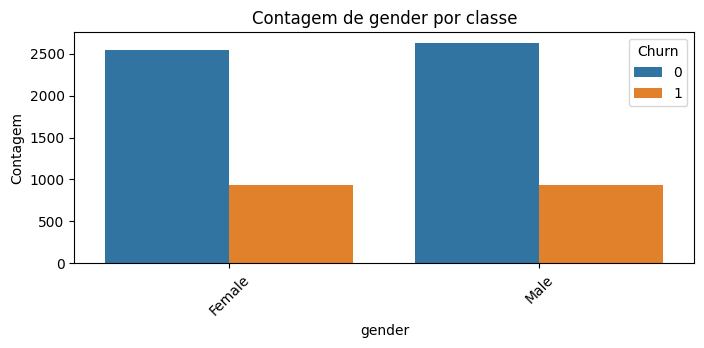

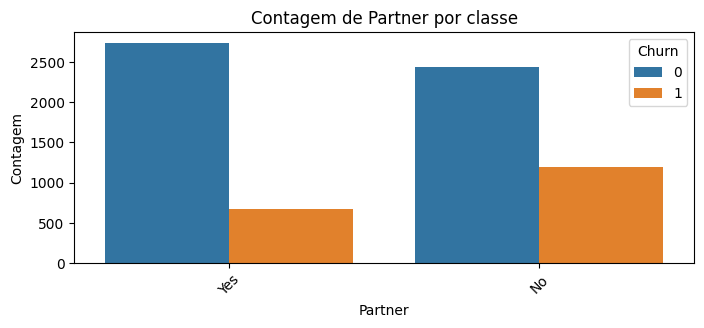

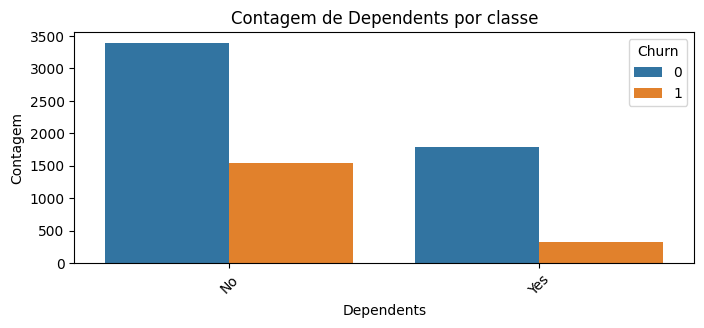

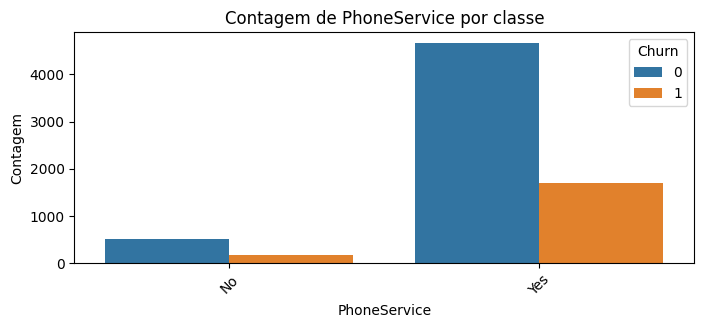

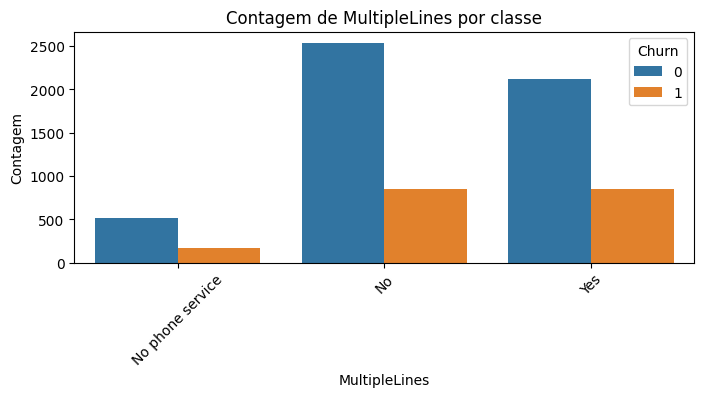

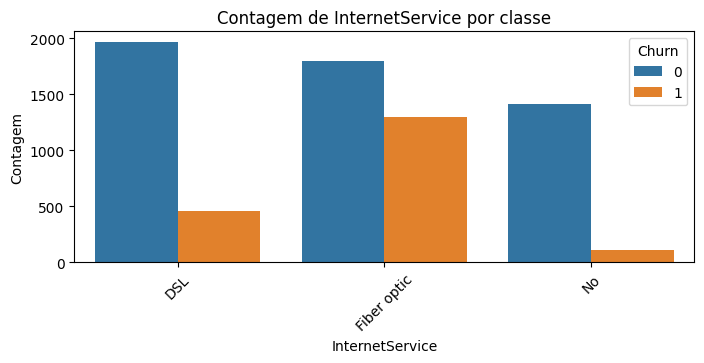

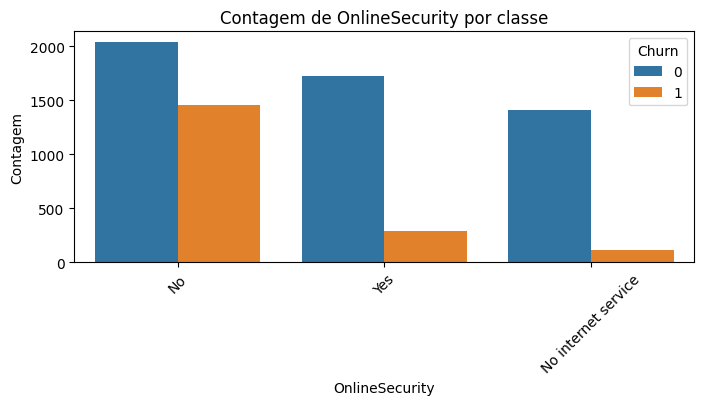

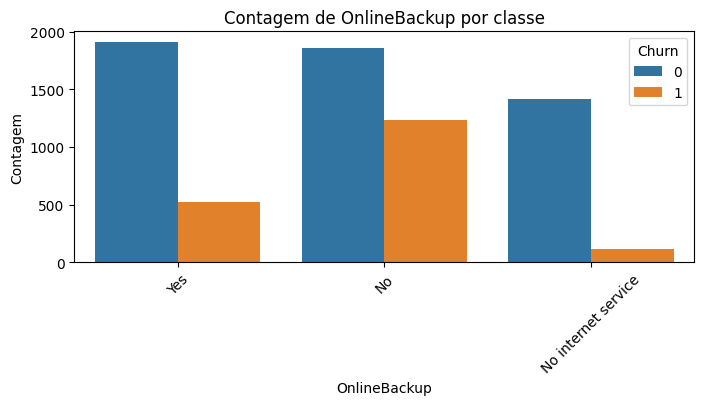

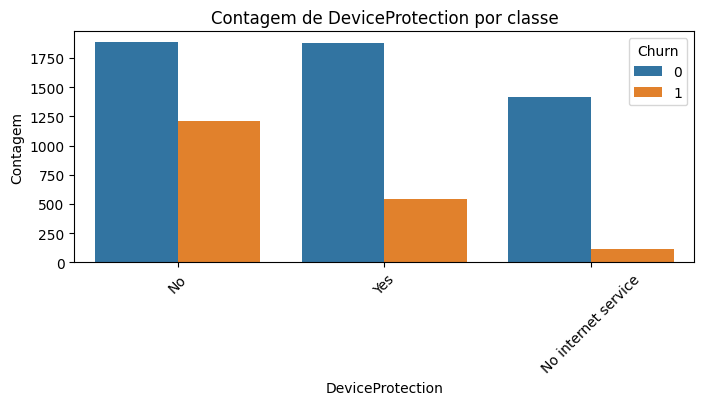

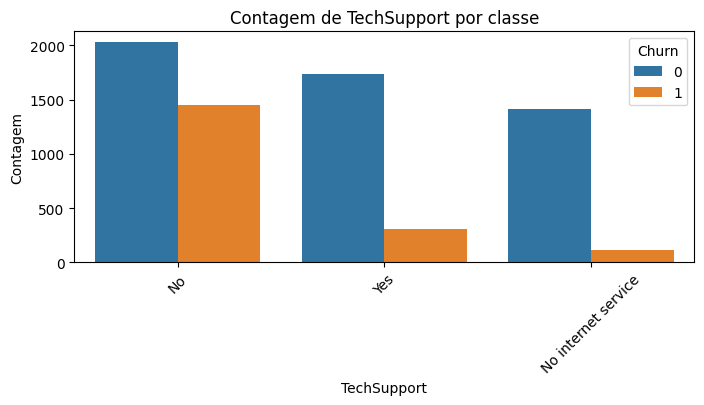

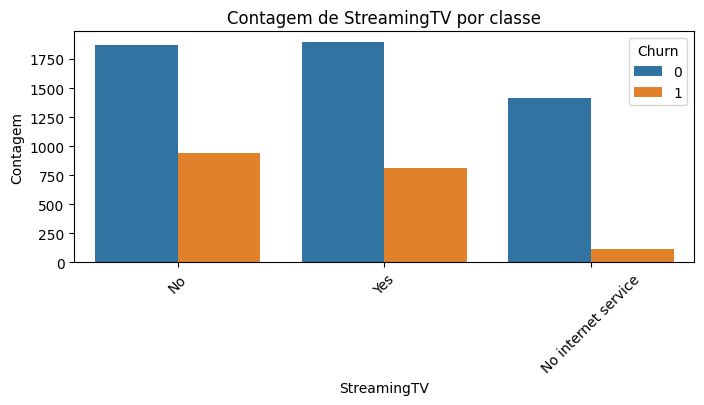

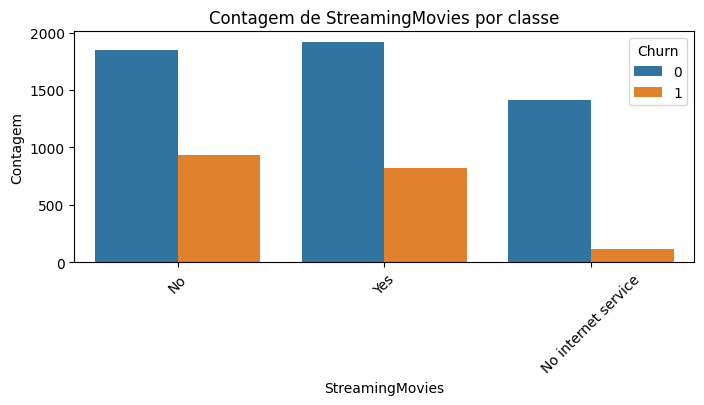

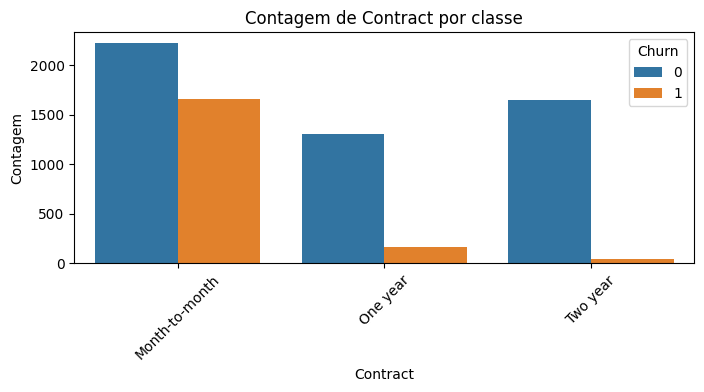

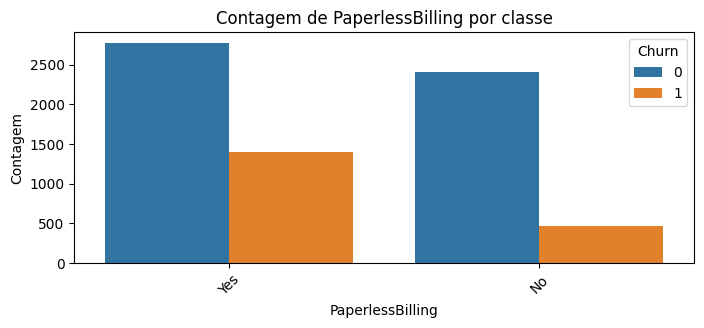

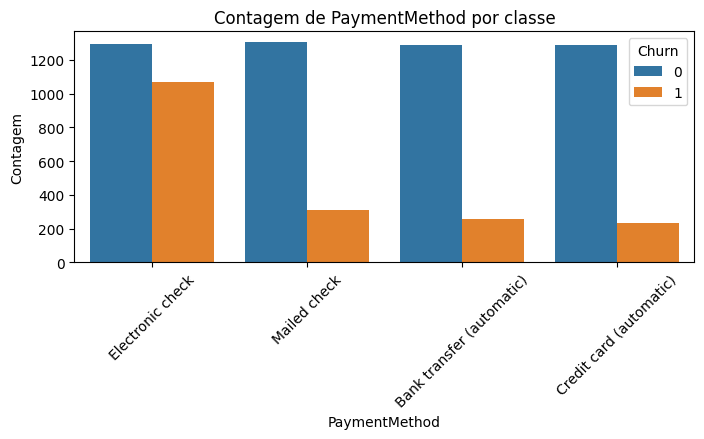

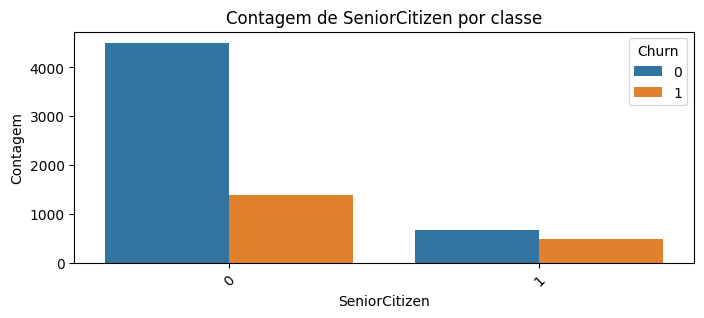

In [ ]:
#Distribuição das variáveis categóricas em relação ao Churn
for cat_column in cat_columns:
  plt.figure(figsize=(8, 3))
  sns.countplot(data=df, x=cat_column, hue='Churn')
  plt.title(f'Contagem de {cat_column} por classe')
  plt.xlabel(cat_column)
  plt.ylabel('Contagem')
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
#Tabela de contigência
for coluna in cat_columns:
  mensagem = f"Tabela de contigência entre {coluna} e o Churn"
  print(len(mensagem) * '-')
  print(mensagem)
  print(len(mensagem) * '-')
  print(pd.crosstab(df[coluna], df['Churn'], normalize = 'index').mul(100).round(2))
  print(len(mensagem) * "#")

--------------------------------------------
Tabela de contigência entre gender e o Churn
--------------------------------------------
Churn       0      1
gender              
Female  73.08  26.92
Male    73.84  26.16
############################################
---------------------------------------------
Tabela de contigência entre Partner e o Churn
---------------------------------------------
Churn        0      1
Partner              
No       67.04  32.96
Yes      80.34  19.66
#############################################
------------------------------------------------
Tabela de contigência entre Dependents e o Churn
------------------------------------------------
Churn           0      1
Dependents              
No          68.72  31.28
Yes         84.55  15.45
################################################
--------------------------------------------------
Tabela de contigência entre PhoneService e o Churn
--------------------------------------------------
Churn          

##Construção de features

In [ ]:
df.shape

(7043, 21)

In [ ]:
#Criando feature para os clientes que possua serviço de streaming
df['Has_Streaming_Service'] = (df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')
df['Has_Streaming_Service'] = df['Has_Streaming_Service'].astype(int)

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Has_Streaming_Service
4141,8450-UYIBU,Female,1,No,No,35,No,No phone service,DSL,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,39.85,1434.599976,0,1
3811,3620-MWJNE,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,Month-to-month,Yes,Mailed check,54.45,87.300003,0,0
3164,2603-HVKCG,Male,0,No,No,31,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,3143.649902,0,1
2897,8234-GSZYK,Male,0,No,No,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.45,1110.050049,0,0
205,7674-YTAFD,Female,0,No,No,33,Yes,No,Fiber optic,No,...,Yes,No,No,One year,Yes,Bank transfer (automatic),79.95,2684.850098,0,0
2637,7665-NKLAV,Female,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,Credit card (automatic),40.65,1547.349976,0,0
4613,6987-XQSJT,Female,1,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,79.50,4370.250000,1,0
1903,3318-NMQXL,Male,0,No,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.00,266.799988,0,1
5402,5057-RKGLH,Female,0,Yes,Yes,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,191.100006,0,0
6049,7634-HLQJR,Female,0,Yes,Yes,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,1016.700012,0,0


##Recorte da base de dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Drop das colunas que não serão usadas no modelo
colunas_to_drop = ['customerID', 'StreamingMovies', 'StreamingTV']
df_selected = df.drop(colunas_to_drop, axis = 1)

In [ ]:
X = df_selected.drop('Churn', axis = 1)
y = df_selected['Churn']

In [ ]:
#Siplit da base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts(normalize = True)

0    0.734469
1    0.265531
Name: Churn, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

0    0.735273
1    0.264727
Name: Churn, dtype: float64

##Tratamento das features categóricas

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 5634 non-null   object 
 1   SeniorCitizen          5634 non-null   int64  
 2   Partner                5634 non-null   object 
 3   Dependents             5634 non-null   object 
 4   tenure                 5634 non-null   int64  
 5   PhoneService           5634 non-null   object 
 6   MultipleLines          5634 non-null   object 
 7   InternetService        5634 non-null   object 
 8   OnlineSecurity         5634 non-null   object 
 9   OnlineBackup           5634 non-null   object 
 10  DeviceProtection       5634 non-null   object 
 11  TechSupport            5634 non-null   object 
 12  Contract               5634 non-null   object 
 13  PaperlessBilling       5634 non-null   object 
 14  PaymentMethod          5634 non-null   object 
 15  Mo

In [ ]:
#Identificando valores nulos no X_train
X_train.isna().sum()

gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges             10
Has_Streaming_Service     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Tratando valores nulos no X_train e X_test
imp_most = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most.fit(X_train['TotalCharges'].values.reshape(-1, 1))
X_train['TotalCharges'] = imp_most.transform(X_train['TotalCharges'].values.reshape(-1, 1))
X_test['TotalCharges'] = imp_most.transform(X_test['TotalCharges'].values.reshape(-1, 1))

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder

In [ ]:
#Convertendo valores para encode utilizando a ferramenta oneHot
cat_to_onehot =  [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'PaperlessBilling',
    'PaymentMethod',
]
one_hot_enc = OneHotEncoder(cols = cat_to_onehot)
one_hot_enc.fit(X_train)
X_train_encode = one_hot_enc.transform(X_train)

Para conversão das colunas acima, foi utilizado o método oneHotEncoder, considerando que as colunas não apresentam uma ordem intrínseca, e apresentam um número razoável de categórias únicas.

In [ ]:
X_train_encode

,gender_1,gender_2,SeniorCitizen,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,...,Contract,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges,Has_Streaming_Service
2142,1,0,0,1,0,1,0,21,1,0,...,One year,1,0,1,0,0,0,64.85,1336.800049,1
1623,1,0,0,1,0,0,1,54,1,0,...,Two year,0,1,0,1,0,0,97.20,5129.450195,1
6074,0,1,0,0,1,0,1,1,0,1,...,Month-to-month,0,1,0,0,1,0,23.45,23.450001,0
1362,0,1,0,1,0,0,1,4,1,0,...,Month-to-month,0,1,0,0,1,0,70.20,237.949997,0
6754,0,1,0,1,0,1,0,0,1,0,...,Two year,0,1,0,1,0,0,61.90,20.200001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,0,1,0,1,1,1,0,...,Month-to-month,0,1,0,0,1,0,95.00,95.000000,1
5191,1,0,0,0,1,1,0,23,1,0,...,Two year,0,1,0,0,0,1,91.10,2198.300049,1
5226,0,1,0,0,1,1,0,12,1,0,...,Month-to-month,0,1,0,0,1,0,21.15,306.049988,0
5390,0,1,1,1,0,0,1,12,1,0,...,Month-to-month,0,1,0,0,1,0,99.45,1200.150024,1


In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
cat_to_ordinal = ['Contract']

mapping_education = [{ 'col' : 'Contract',
                      'mapping' : {
                          'Month-to-month' : 1,
                          'One year' : 2,
                          'Two year' : 3,
                      }
}]

In [ ]:
ordinal_enc = OrdinalEncoder(cols = cat_to_ordinal, mapping = mapping_education)
ordinal_enc.fit(X_train_encode)
X_train_encode = ordinal_enc.transform(X_train_encode)

Para conversão da coluna Contract, foi utilizado o método OrdinalEncoder, por entender que os valores categóricos apresentam uma ordem implícita.

In [ ]:
X_train_encode

,gender_1,gender_2,SeniorCitizen,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,...,Contract,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges,Has_Streaming_Service
2142,1,0,0,1,0,1,0,21,1,0,...,2,1,0,1,0,0,0,64.85,1336.800049,1
1623,1,0,0,1,0,0,1,54,1,0,...,3,0,1,0,1,0,0,97.20,5129.450195,1
6074,0,1,0,0,1,0,1,1,0,1,...,1,0,1,0,0,1,0,23.45,23.450001,0
1362,0,1,0,1,0,0,1,4,1,0,...,1,0,1,0,0,1,0,70.20,237.949997,0
6754,0,1,0,1,0,1,0,0,1,0,...,3,0,1,0,1,0,0,61.90,20.200001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,0,1,0,1,1,1,0,...,1,0,1,0,0,1,0,95.00,95.000000,1
5191,1,0,0,0,1,1,0,23,1,0,...,3,0,1,0,0,0,1,91.10,2198.300049,1
5226,0,1,0,0,1,1,0,12,1,0,...,1,0,1,0,0,1,0,21.15,306.049988,0
5390,0,1,1,1,0,0,1,12,1,0,...,1,0,1,0,0,1,0,99.45,1200.150024,1


In [ ]:
#Todos os valores do dataframe estão em tipos númericos
X_train_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender_1               5634 non-null   int64  
 1   gender_2               5634 non-null   int64  
 2   SeniorCitizen          5634 non-null   int64  
 3   Partner_1              5634 non-null   int64  
 4   Partner_2              5634 non-null   int64  
 5   Dependents_1           5634 non-null   int64  
 6   Dependents_2           5634 non-null   int64  
 7   tenure                 5634 non-null   int64  
 8   PhoneService_1         5634 non-null   int64  
 9   PhoneService_2         5634 non-null   int64  
 10  MultipleLines_1        5634 non-null   int64  
 11  MultipleLines_2        5634 non-null   int64  
 12  MultipleLines_3        5634 non-null   int64  
 13  InternetService_1      5634 non-null   int64  
 14  InternetService_2      5634 non-null   int64  
 15  In

In [ ]:
X_test_encode = one_hot_enc.transform(X_test)
X_test_encode = ordinal_enc.transform(X_test_encode)

In [ ]:
#Outiliers
# X_train_encode['TotalCharges'].hist()

In [ ]:
# qtd_desvios = 3
# upper_total_charges = X_train_encode['TotalCharges'].std() * qtd_desvios
# X_train_encode['TotalCharges'] = X_train_encode['TotalCharges'].apply(lambda x: upper_total_charges if x> upper_total_charges else x)
# X_test_encode['TotalCharges'] = X_test_encode['TotalCharges'].apply(lambda x: upper_total_charges if x> upper_total_charges else x )

In [ ]:
# X_train_encode['TotalCharges'].hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Normalização da base de dados
scaler = MinMaxScaler().set_output(transform = "pandas")
scaler.fit(X_train_encode)
X_train_norm = scaler.transform(X_train_encode)
X_test_norm = scaler.transform(X_test_encode)

In [ ]:
X_train_norm.describe()

,gender_1,gender_2,SeniorCitizen,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,...,Contract,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges,Has_Streaming_Service
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,...,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.487575,0.512425,0.160809,0.515442,0.484558,0.298722,0.701278,0.449626,0.902023,0.097977,...,0.345225,0.409833,0.590167,0.227547,0.219737,0.334931,0.217785,0.464517,0.261750,0.499823
std,0.499890,0.499890,0.367388,0.499806,0.499806,0.457738,0.457738,0.339230,0.297309,0.297309,...,0.415084,0.491846,0.491846,0.419286,0.414105,0.472008,0.412777,0.299844,0.261154,0.500044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174390,0.044712,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.402778,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.520927,0.160033,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.763889,1.000000,0.000000,...,0.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.714375,0.437089,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Modelagem/Treinamento

###Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Regressão lógistica
clf = LogisticRegression(random_state=42)
clf.fit(X_train_norm, y_train)

LogisticRegression(random_state=42)

In [ ]:
predict_train = clf.predict(X_train_norm)
predict_test = clf.predict(X_test_norm)

In [ ]:
from sklearn.metrics import accuracy_score as ACC

In [ ]:
y_train.value_counts(normalize=True)

0    0.734469
1    0.265531
Name: Churn, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.735273
1    0.264727
Name: Churn, dtype: float64

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

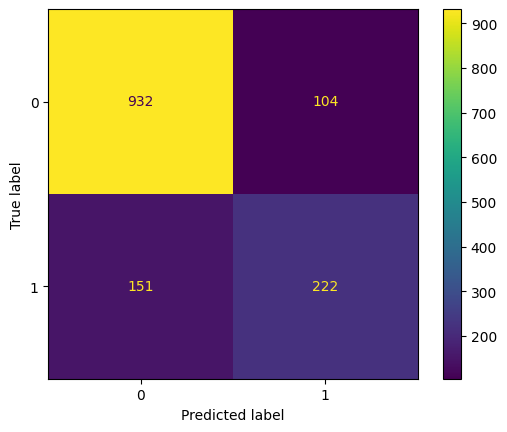

In [ ]:
#Matriz de Confusão - Conjunto de Teste
ConfusionMatrixDisplay.from_predictions(y_test, predict_test)

In [ ]:
#Classification_report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predict_test, zero_division = 0))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
print(classification_report(y_train, predict_train, zero_division = 0))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.65      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



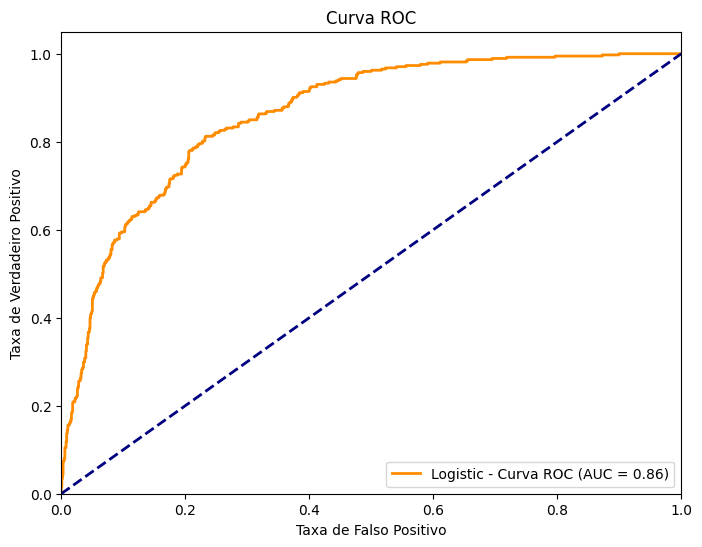

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = clf.predict_proba(X_test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic - Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

###KNN

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predict_train = neigh.predict(X_train_norm)
predict_test = neigh.predict(X_test_norm)

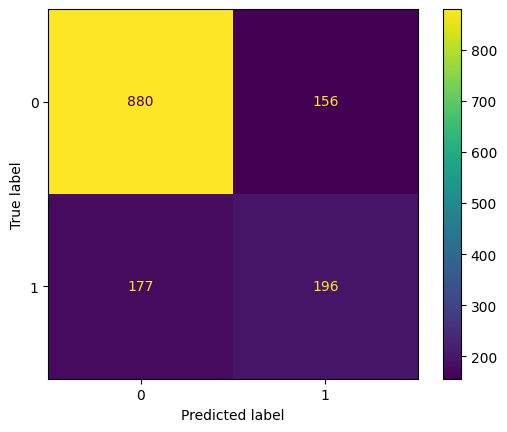

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test)

In [ ]:
print(classification_report(y_train, predict_train, zero_division = 0))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4138
           1       0.76      0.67      0.71      1496

    accuracy                           0.86      5634
   macro avg       0.82      0.80      0.81      5634
weighted avg       0.85      0.86      0.85      5634



In [ ]:
print(classification_report(y_test, predict_test, zero_division = 0))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.56      0.53      0.54       373

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409



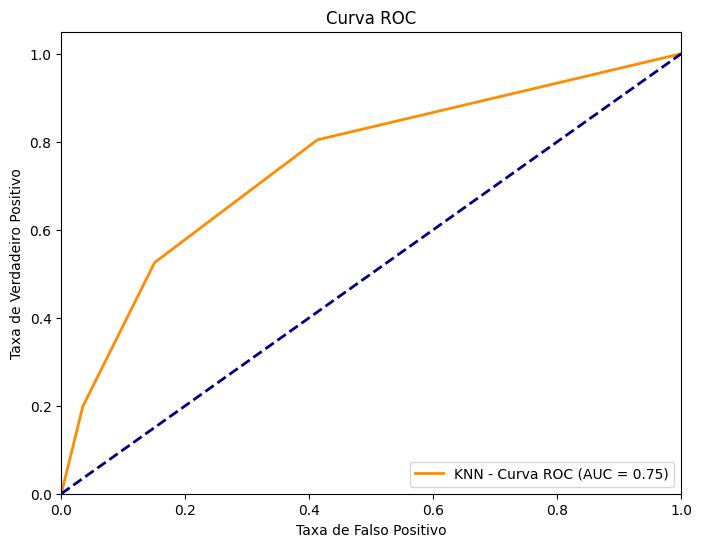

In [ ]:
y_pred_proba = neigh.predict_proba(X_test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='KNN - Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

###Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Árvore de Decisão
decTree = DecisionTreeClassifier(random_state=42)
decTree.fit(X_train_norm, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predict_train = decTree.predict(X_train_norm)
predict_test = decTree.predict(X_test_norm)

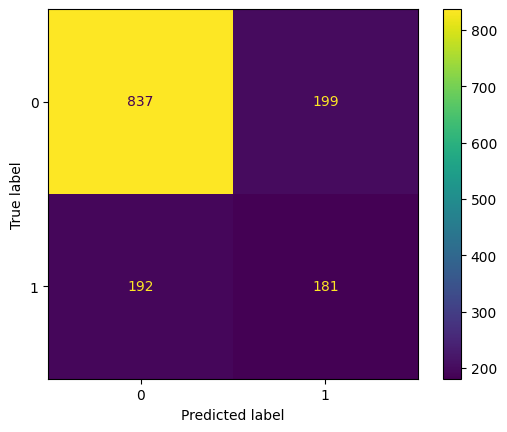

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test)

In [ ]:
print(classification_report(y_train, predict_train, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [ ]:
print(classification_report(y_test, predict_test, zero_division = 0))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409



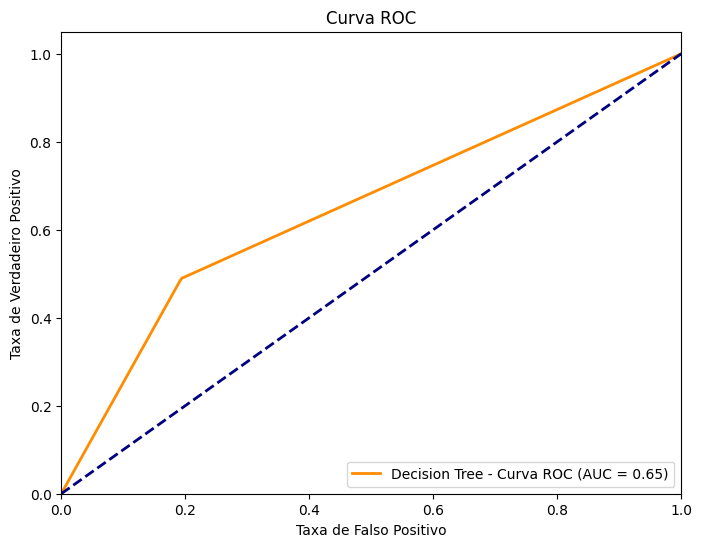

In [ ]:
y_pred_proba = decTree.predict_proba(X_test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Decision Tree - Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

##Modelagem com gridsearsh


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
X_train_reduzido, X_val, y_train_reduzido, y_val = train_test_split(X_train_norm, y_train, test_size=0.2, random_state=42)

Regressão Logística

In [ ]:
#Seleção de Parâmetros
penaltys = [None, 'l1', 'l2', 'elasticnet']
solvers = ['lbfgs', 'liblinear']

best_f1_score = 0
best_penalty = None
best_solver = None

for penalty in penaltys:
  for solver in solvers:
    print(f'{penalty} e {solver}')
    try:

      logistic = LogisticRegression(penalty = penalty, solver = solver, random_state = 42)
      logistic.fit(X_train_reduzido, y_train_reduzido)
      pred_val = logistic.predict(X_val)

    except ValueError:
      print(f"{penalty} e {solver} não podem ser combinados!")
      continue

    f1 = f1_score(y_val, pred_val)
    if f1 > best_f1_score:

      best_f1_score = f1
      best_penalty = penalty
      best_solver = solver

None e lbfgs
None e liblinear
None e liblinear não podem ser combinados!
l1 e lbfgs
l1 e lbfgs não podem ser combinados!
l1 e liblinear
l2 e lbfgs
l2 e liblinear
elasticnet e lbfgs
elasticnet e lbfgs não podem ser combinados!
elasticnet e liblinear
elasticnet e liblinear não podem ser combinados!


In [ ]:
#Parâmetros selecionados
(best_penalty, best_solver)

(None, 'lbfgs')

In [ ]:
#Regressão Lógistica
#Treinamento com parâmetros selecionados
logistic = LogisticRegression(penalty = best_penalty, solver = best_solver, random_state=42)
logistic.fit(X_train_norm, y_train)

LogisticRegression(penalty=None, random_state=42)

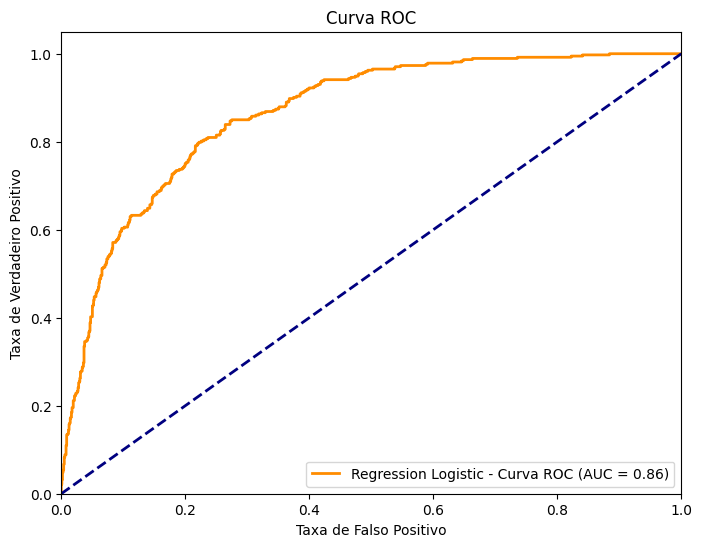

In [ ]:
#Regressão Logistíca
y_pred_proba = logistic.predict_proba(X_test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Regression Logistic - Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

KNN

In [ ]:
#Seleção de Parâmetros
ks = [3, 5, 7, 9, 11, 13, 15, 17, 19, 22, 24, 28, 30, 40]
best_f1_score = 0
best_k = None

for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_reduzido, y_train_reduzido)
    y_pred = neigh.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_k = k

In [ ]:
#Parâmetro selecionado
best_k

19

In [ ]:
#KNN
#Treinamento com parâmetros selecionados
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=19)

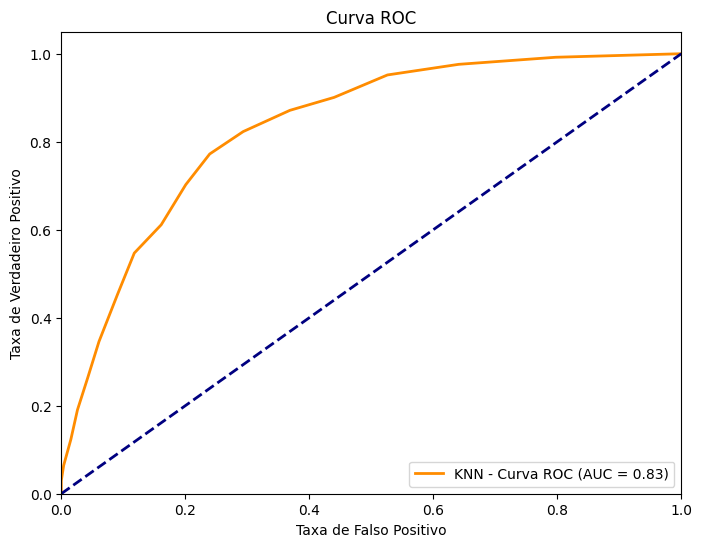

In [ ]:
#KNN
y_pred_proba = neigh.predict_proba(X_test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='KNN - Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Árvore de Decisão

In [ ]:
#Seleção de parÂmetros
criterios = ['gini', 'entropy', 'log_loss']
max_depths = [10, 20, 30, 40, 50, 100]
best_f1_score = 0
best_criterio = None
best_max_depth = None

for criterio in criterios:
  for max_depth in max_depths:
    decTree = DecisionTreeClassifier(criterion=criterio, max_depth=max_depth, random_state=42)
    decTree.fit(X_train_reduzido, y_train_reduzido)

    y_pred = decTree.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    if f1 > best_f1_score:
      best_f1_score = f1
      best_criterio = criterio
      best_max_depth = max_depth

In [ ]:
# Parâmetros selecionados
(best_criterio, best_max_depth)

('entropy', 10)

In [ ]:
#Árvore de Decisão
#Treinamento com parâmetros selecionados
decTree = DecisionTreeClassifier(criterion=best_criterio, max_depth=best_max_depth, random_state=42)
decTree.fit(X_train_norm, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

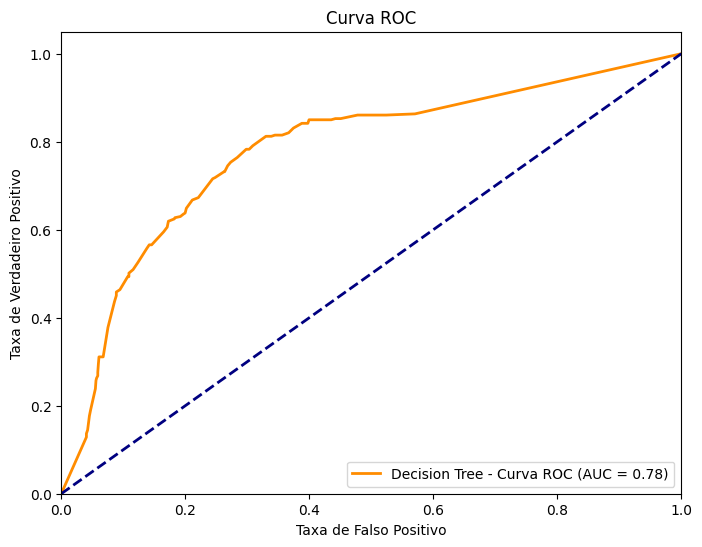

In [ ]:
# Árvore de Decisão
y_pred_proba = decTree.predict_proba(X_test_norm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Decision Tree - Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Comparativo entre modelos**

In [ ]:
# Previsões para dados de treinamento
y_pred_train_logistic_train = logistic.predict(X_train_norm)
y_pred_train_knn_train = neigh.predict(X_train_norm)
y_pred_train_dt_train = decTree.predict(X_train_norm)

# Previsões para dados de teste
y_pred_train_logistic_test = logistic.predict(X_test_norm)
y_pred_train_knn_test = neigh.predict(X_test_norm)
y_pred_train_dt_test = decTree.predict(X_test_norm)

print('------------------Regressão Logistica Treinamento:')
print(classification_report(y_train, y_pred_train_logistic_train, zero_division=0))
print('------------------Regressão Logistica Teste:')
print(classification_report(y_test, y_pred_train_logistic_test, zero_division=0))

print('------------------KNN Treinamento:')
print(classification_report(y_train, y_pred_train_knn_train, zero_division=0))
print('------------------KNN Teste:')
print(classification_report(y_test, y_pred_train_knn_test, zero_division=0))

print('------------------Decision Tree Treinamento:')
print(classification_report(y_train, y_pred_train_dt_train, zero_division=0))
print('------------------Decision Tree Teste:')
print(classification_report(y_test, y_pred_train_dt_test, zero_division=0))


------------------Regressão Logistica Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.66      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634

------------------Regressão Logistica Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.61      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

------------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.64      0.55      0.59      1496

    accuracy                           0.80      56

##Técnicas de otimização de desempenho

###Crossvalidation

In [ ]:
from sklearn.model_selection import GridSearchCV

Árvore de Decisão

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [10, 20, 30, 40, 50, 100],
    'class_weight' : [ {0:1, 1:1}, {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:10} ]
  }

dt = DecisionTreeClassifier()
dt = GridSearchCV(dt, parameters, cv = 5, scoring = 'f1_macro')
dt.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 4}, {0: 1, 1: 8},
                                          {0: 1, 1: 10}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 100]},
             scoring='f1_macro')

In [ ]:
pd.DataFrame(dt.cv_results_ )[['params','mean_test_score']]

,params,mean_test_score
0,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.692379
1,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.654095
2,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.654012
3,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.654992
4,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.647636
...,...,...
85,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.672612
86,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.664842
87,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.670856
88,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.669317


In [ ]:
dt.best_params_

{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 10}

In [ ]:
best_model = dt.best_estimator_

In [ ]:
score = best_model.score(X_test_norm, y_test)

In [ ]:
print("Melhor score:", score)

Melhor score: 0.7863733144073811


In [ ]:
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4138
           1       0.77      0.67      0.72      1496

    accuracy                           0.86      5634
   macro avg       0.83      0.80      0.81      5634
weighted avg       0.86      0.86      0.86      5634



In [ ]:
print(f'------------Decision Tree Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Regressão Lógistica

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500],
    'solver': ['lbfgs', 'newton-cg'],
    'penalty': ['l2']
}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg']})

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
score = best_model.score(X_test_norm, y_test)

In [ ]:
print("Melhor C:", grid_search.best_params_['C'])
print("Melhor solver:", grid_search.best_params_['solver'])
print("Melhor score:", score)

Melhor C: 10
Melhor solver: lbfgs
Melhor score: 0.8190205819730305


In [ ]:
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------Regressão Logística Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------Regressão Logística Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.66      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634



In [ ]:
print(f'------------Regressão Logistica Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------Regressão Logistica Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.61      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



KNN

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan'],
    'p': [1, 2]
}
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
score = best_model.score(X_test_norm, y_test)

In [ ]:
print("Melhor K:", grid_search.best_params_['n_neighbors'])
print("Melhor metric:", grid_search.best_params_['metric'])
print("Melhor score:", score)

Melhor K: 11
Melhor metric: euclidean
Melhor score: 0.7806955287437899


In [ ]:
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------KNN Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4138
           1       0.66      0.56      0.61      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [ ]:
print(f'------------KNN Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------KNN Teste:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.60      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



###StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

Regressão Lógistica

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500],
    'solver': ['lbfgs', 'newton-cg'],
    'penalty': ['l2']
}

kfolds = StratifiedKFold(5)
logistic = LogisticRegression()
logistic_grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='f1_macro', cv=kfolds)
logistic_grid.fit(X_train_norm, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg']},
             scoring='f1_macro')

In [ ]:
logistic_grid.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
best_model = logistic_grid.best_estimator_
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------Regressão Logistica Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------Regressão Logistica Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.66      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634



In [ ]:
print(f'------------Regressão Logistica Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------Regressão Logistica Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.61      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



Árvore de Decisão

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [10, 20, 30, 40, 50, 100],
    'class_weight' : [ {0:1, 1:1}, {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:10} ]
  }

kfolds = StratifiedKFold(5)
dt = DecisionTreeClassifier()
dt = GridSearchCV(dt, parameters, scoring = 'f1_macro', cv= kfolds.split(X_train_norm,y_train))
dt.fit(X_train_norm, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7c5483f980b0>,
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 4}, {0: 1, 1: 8},
                                          {0: 1, 1: 10}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 100]},
             scoring='f1_macro')

In [ ]:
dt.best_params_

{'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 10}

In [ ]:
best_model = dt.best_estimator_
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4138
           1       0.78      0.67      0.72      1496

    accuracy                           0.86      5634
   macro avg       0.83      0.80      0.81      5634
weighted avg       0.86      0.86      0.86      5634



In [ ]:
print(f'------------Decision Tree Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.62      0.52      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



KNN

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan'],
    'p': [1, 2]
}
kfolds = StratifiedKFold(5)
neigh = KNeighborsClassifier()
neigh = GridSearchCV(neigh, param_grid, scoring = 'f1_macro', cv= kfolds.split(X_train_norm,y_train))
neigh.fit(X_train_norm, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7c5483f98900>,
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]},
             scoring='f1_macro')

In [ ]:
neigh.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'p': 1}

In [ ]:
best_model = neigh.best_estimator_
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------KNN Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4138
           1       0.66      0.56      0.61      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [ ]:
print(f'------------KNN Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------KNN Teste:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.60      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



##Conclusão


A construção do modelo preditivo de Churn de clientes baseou-se na análise de dados de rotatividade de clientes de uma empresa fictícia de telecomunicações, que prestava serviços de telefone residencial e Internet para 7.043 clientes na Califórnia. A base de dados compreendeu 7043 linhas e 21 colunas, sendo 18 do tipo object, 2 do tipo int e 1 do tipo float. Uma análise exploratória detalhada seguiu-se pelo tratamento dos dados.

Na análise numérica, observaram-se as distribuições das colunas em relação ao Churn, além de verificar suas correlações. Não foram encontrados outliers nas colunas numéricas, mas observou-se um limite superior elevado na coluna TotalCharges. Optou-se por converter a coluna Churn em dados numéricos utilizando o LabelEncoder para prosseguir com a análise.

Na análise dos valores categóricos, notou-se que a maioria dos dados em relação ao Churn possuía taxas semelhantes entre suas categorias. Decidiu-se criar a feature Has_Streaming_Service após verificar as correlações, entendendo ser a melhor maneira de representar clientes que utilizam algum serviço de streaming.

Para a construção do modelo, a base foi dividida em 20% para teste e 80% para treino. Utilizou-se o SimpleImputer para valores ausentes e o OneHotEncoder e OrdinalEncoder para converter valores categóricos em numéricos. Optou-se pelo método OrdinalEncoder para a coluna Contract, devido à ordem implícita dos valores categóricos. Para as demais colunas, utilizou-se o método OneHotEncoder, considerando que não apresentavam uma ordem intrínseca e possuíam um número razoável de categorias únicas. Toda a base foi normalizada.

Testaram-se três modelos de Machine Learning: Regressão Logística, KNN e Árvore de Decisão. Cada modelo foi avaliado por meio de várias métricas, incluindo acurácia, precisão, recall, pontuação F1, curva ROC e matriz de confusão. Além disso, utilizou-se a modelagem de grid search para otimizar os hiperparâmetros dos modelos de machine learning, bem como técnicas de CrossValidation e StratifiedKFold para avaliar de forma mais confiável o desempenho do modelo, detectar overfitting, selecionar modelos e hiperparâmetros, e reduzir o viés na avaliação do desempenho do modelo.

1. Ao analisar o desempenho em treinamento, a Árvore de Decisão apresentou os melhores resultados para predição  de churn com uma precisão de 0.78, acurácia de 0.86, recall de 0.67 e pontuação F1 de 0.72, utilizando a modelagem de Grid Search. No entanto, não houve melhora no desempenho com técnicas de CrossValidation e StratifiedKFold.

2. Em relação ao desempenho em teste, a Regressão Logística obteve os melhores resultados para predição  de churn com uma precisão de 0.68, acurácia de 0.82, recall de 0.61, pontuação F1 de 0.64 e AUC de 0.86 na curva ROC, indicando a alta capacidade do modelo em classificar independentemente do ponto de corte escolhido. Esses resultados se mantiveram ao utilizar técnicas de CrossValidation e StratifiedKFold.

3. Com base nos resultados obtidos, o modelo mais adequado para ser implementado em um sistema de previsão de churn seria a Regressão Logística, devido à sua precisão consistente e desempenho satisfatório em todas as métricas avaliadas.